In [74]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import numpy as np


In [2]:
data = loadmat('05261m.mat')  # Replace with your file name


In [3]:
data

{'__header__': b'MATLAB 5.0',
 '__version__': '1.0',
 '__globals__': [],
 'val': array([[  5,   9,   7, ..., -21, -14,  -4]], shape=(1, 2500), dtype=int16)}

In [4]:
print("Keys in the .mat file:", data.keys())

Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'val'])


In [13]:
df = pd.DataFrame(data['val'][0])
df.describe()

,0
count,2500.000000
mean,-12.073200
std,34.123763
min,-263.000000
25%,-19.000000
50%,-7.000000
75%,4.000000
max,82.000000


In [29]:
#Standardization 
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df))

In [32]:
df_standard

,0
0,0.500432
1,0.617676
2,0.559054
3,0.295255
4,0.236633
...,...
2495,0.178011
2496,0.178011
2497,-0.261653
2498,-0.056476


Text(0, 0.5, 'Amplitude')

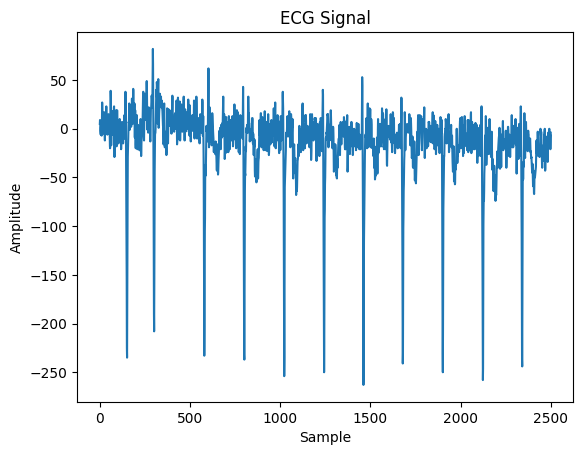

In [33]:
# plt.plot(df)
plt.plot(df)
plt.title('ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

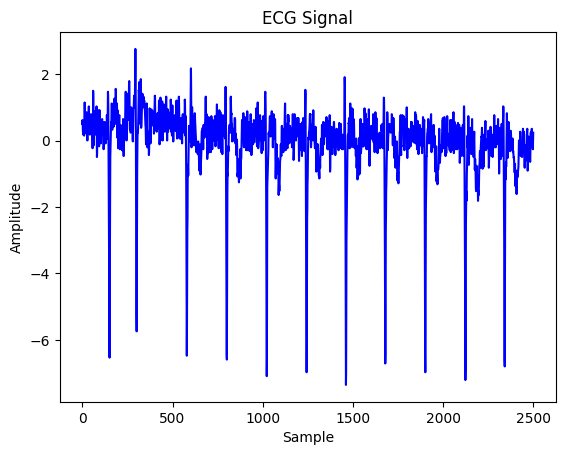

In [44]:
# plt.plot(df)
plt.plot(df_standard, color = "blue")
plt.title('ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

In [57]:
df_new = savgol_filter(df_standard[0], 10, 3 , deriv = 0 , delta= 1.0, axis = -1, mode = 'interp' , cval = 0.0)

In [67]:
df_new = df_new[0:2500] * (-1)

In [79]:
df_new

array([-0.6082469 , -0.49291615, -0.41502691, ...,  0.03908791,
       -0.03343791, -0.15874395], shape=(2500,))

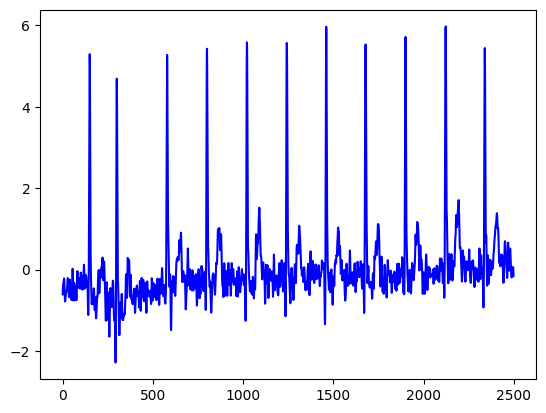

In [69]:
plt.plot(df_new , color = "blue")


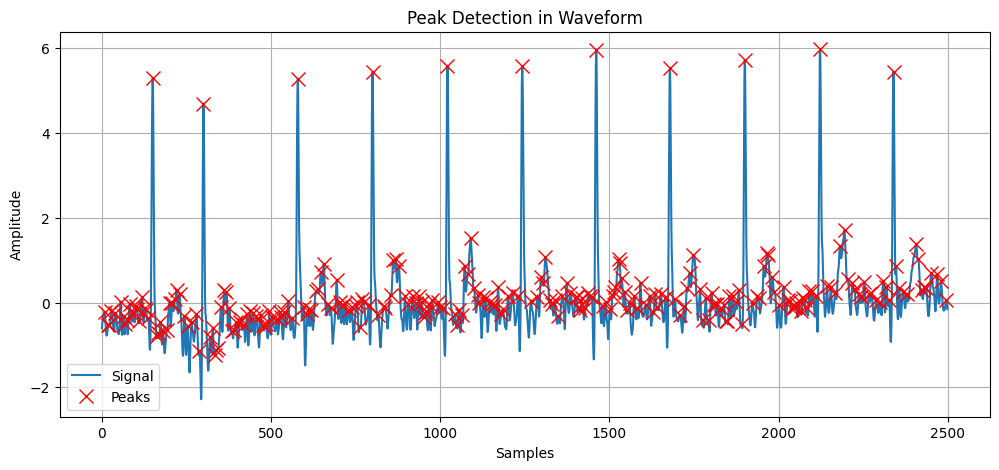

In [72]:
peaks, _ = find_peaks(df_new)
plt.figure(figsize=(12, 5))
plt.plot(df_new, label="Signal")
plt.plot(peaks, df_new[peaks], "rx", label="Peaks", markersize=10)  # Mark peaks with red 'x'
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Peak Detection in Waveform")
plt.legend()
plt.grid(True)
plt.show()

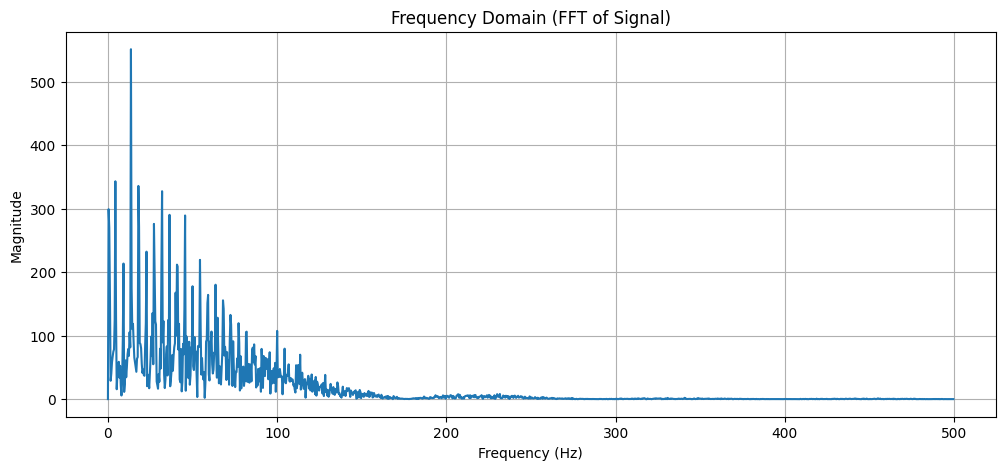

In [77]:
fft_signal = np.fft.fft(df_new)
sampling_rate = 1000 
n = len(df_new)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
magnitude = np.abs(fft_signal)

plt.figure(figsize=(12, 5))
plt.plot(frequencies[:n//2], magnitude[:n//2])  
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain (FFT of Signal)")
plt.grid(True)
plt.show()